In [1]:
from glob import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULTS = glob(os.path.join("set_rank_results_conv_cifar100", "*.json"))
results = pd.DataFrame([json.load(open(file)) for file in RESULTS])
results["best_val_categorical_accuracy"] = results["val_categorical_accuracy"].map(np.max)
results.head()

,initial_rank,new_rank,rank_update_epoch,total_epochs,loss,categorical_accuracy,val_loss,val_categorical_accuracy,pre_update_loss,pre_update_categorical_accuracy,pre_update_val_loss,pre_update_val_categorical_accuracy,post_update_loss,post_update_categorical_accuracy,post_update_val_loss,post_update_val_categorical_accuracy,best_val_categorical_accuracy
0,-1,1,2,50,"[4.2098774909973145, 3.7548668384552, 3.493559...","[0.056859999895095825, 0.1296599954366684, 0.1...","[3.933332920074463, 3.5879945755004883, 3.4347...","[0.09830000251531601, 0.16130000352859497, 0.1...",3.556517,0.16402,3.587995,0.1613,3.556517,0.16402,3.587995,0.1613,0.4249
1,-1,50,2,50,"[4.234189510345459, 3.7823097705841064, 3.4778...","[0.05065999925136566, 0.12253999710083008, 0.1...","[3.9925167560577393, 3.6014816761016846, 3.423...","[0.08460000157356262, 0.15029999613761902, 0.1...",3.579200,0.15616,3.601446,0.1504,3.579200,0.15616,3.601446,0.1504,0.4167
2,-1,10,1,50,"[4.21505069732666, 3.771216869354248, 3.477980...","[0.053679998964071274, 0.1236800029873848, 0.1...","[3.9819538593292236, 3.598951578140259, 3.4070...","[0.08749999850988388, 0.16089999675750732, 0.1...",3.958347,0.09196,3.981955,0.0875,3.958347,0.09196,3.981955,0.0875,0.4209
3,-1,50,2,50,"[4.202199459075928, 3.7313878536224365, 3.4509...","[0.05696000158786774, 0.132860004901886, 0.179...","[3.9003472328186035, 3.5738186836242676, 3.401...","[0.10499999672174454, 0.1632000058889389, 0.18...",3.538350,0.16746,3.573815,0.1632,3.538350,0.16746,3.573815,0.1632,0.4228
4,-1,10,2,50,"[4.212864875793457, 3.736795663833618, 3.47986...","[0.053700000047683716, 0.12613999843597412, 0....","[3.9154319763183594, 3.589157819747925, 3.4086...","[0.0997999981045723, 0.1535000056028366, 0.190...",3.555151,0.15974,3.589158,0.1535,3.555151,0.15974,3.589158,0.1535,0.4251


In [3]:
results["new_rank"].unique(), results["rank_update_epoch"].unique()

(array([  1,  50,  10, 160]), array([2, 1, 3]))

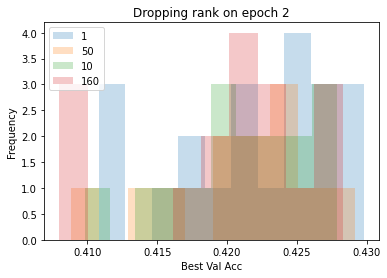

best_val_categorical_accuracy      
                                  mean count
new_rank                                    
1                             0.421890    21
10                            0.421362    16
50                            0.421075    12
160                           0.420253    17

In [7]:
update_epoch = 2
epoch_results = results.loc[
    results["rank_update_epoch"] == update_epoch,
    ["new_rank", "best_val_categorical_accuracy"]
]
for new_rank in epoch_results["new_rank"].unique():
    plt.hist(
        epoch_results.loc[epoch_results["new_rank"] == new_rank, ["best_val_categorical_accuracy"]],
        label=f"{new_rank}",
        # bins=10,
        alpha=0.25)
plt.title(f"Dropping rank on epoch {update_epoch}")
plt.xlabel("Best Val Acc")
plt.ylabel("Frequency")
plt.legend()
plt.show()
epoch_results.groupby("new_rank").agg({"best_val_categorical_accuracy": ["mean", "count"]})

In [8]:
from scipy import stats
stats.ttest_ind(
    epoch_results.loc[epoch_results["new_rank"] == 1, "best_val_categorical_accuracy"],
    epoch_results.loc[epoch_results["new_rank"] == 10, "best_val_categorical_accuracy"],
)

Ttest_indResult(statistic=0.2941894265381319, pvalue=0.7703508893863821)